## Загрузка и ознакомление с предоставленными данными

In [1]:
import pandas as pd
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import math as mth
import numpy as np
from scipy import stats as st
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
ab_project_marketing_events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_project_marketing_events.csv')

In [3]:
ab_project_marketing_events = ab_project_marketing_events.sort_values(by='start_dt').reset_index(drop=True)

In [4]:
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
3,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
4,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
5,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
6,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
7,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
8,4th of July Promo,N.America,2020-07-04,2020-07-11
9,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


In [5]:
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [6]:
final_ab_new_users =  pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_new_users.csv')

In [7]:
final_ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [8]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [9]:
final_ab_events =  pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_events.csv')

In [10]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [11]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [12]:
final_ab_participants =  pd.read_csv('https://code.s3.yandex.net/datasets/final_ab_participants.csv')

In [13]:
final_ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [14]:
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


На данном этапе ознакомились с данными.

## Подготовка данных

Для начала проверим данные на наличие явных дубликатов.

In [15]:
final_ab_new_users.duplicated().sum()

0

В переменной final_ab_new_users нет явных дубликатов.

In [16]:
final_ab_events.duplicated().sum()

0

В переменной final_ab_events нет явных дубликатов.

In [17]:
final_ab_participants.duplicated().sum()

0

В переменной final_ab_participants нет явных дубликатов.

In [18]:
ab_project_marketing_events.duplicated().sum()

0

В переменной ab_project_marketing_events нет явных дубликатов.

Проверим наличие неявных дубликатов в столбце id переменной final_ab_new_users.

In [19]:
final_ab_new_users.duplicated().sum()

0

Повторяющихся id в переменной final_ab_new_users нет.

Далее переведем столбцы с датами в во всех переменных в удобный для работы формат.

In [20]:
final_ab_new_users['first_date'] = pd.to_datetime(final_ab_new_users['first_date'])

In [21]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


In [22]:
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'])

In [23]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


In [24]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [25]:
ab_project_marketing_events['start_dt'] = pd.to_datetime(ab_project_marketing_events['start_dt'])

In [26]:
ab_project_marketing_events['finish_dt'] = pd.to_datetime(ab_project_marketing_events['finish_dt'])

In [27]:
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


Столбцы с датами приведены в удобный формат.

В ознакомлении с данными заметили, что в столбце details переменной final_ab_events имеются пропуски. Попробуем выяснить, с чем они связаны.

In [28]:
 final_ab_events['event_name'].unique() # Узнаем, какие есть уникальные значения в столбце event_name.

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [29]:
final_ab_events_null = final_ab_events[final_ab_events.isnull().any(axis=1)] # Создадим переменную где сохраним 
                                                                              # данные где есть пропуски

In [30]:
final_ab_events_null['event_name'].unique() # Узнаем, какие уникальные значения в столбце event_name остались.

array(['product_cart', 'product_page', 'login'], dtype=object)

In [31]:
final_ab_events['details'].unique() # Узнаем, какие есть уникальные значения в столбце details.

array([ 99.99,   9.99,   4.99, 499.99,    nan])

Исходя из того, что значение отсутствет во всех строках, где нет purchase, при этом purchase равное 0 нет, можно сделать вывод, что скорее всего данные пропуски связаны с тем, что клиентами не были потрачены деньги по операциям. Данные пропуски можно заменить на 0

In [32]:
final_ab_events['details'] = final_ab_events['details'].fillna(0)

На данном этапе проверили данные на явные и неявные дубликаты, устранили пропуски и проанализировали их природу, переименовали столбцы, изменили типы данных в столбцах.

## Анализ данных

### Проверка соответствия данных требованиям технического задания

#### Название теста: recommender_system_test

В техническом задании имеется название теста, recommender_system_test. Проверим, только он ли в предоставленных данных.

In [33]:
final_ab_participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

Как видим, в данных имеются 2 теста. Посмотрим количество в данных каждого теста.

In [34]:
final_ab_participants['ab_test'].value_counts()

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

#### Группы: А — контрольная, B — новая платёжная воронка

В техническом задании имеется название групп: А — контрольная, B — новая платёжная воронка. Проверим, только он ли в предоставленных данных.

In [35]:
final_ab_participants['group'].unique()

array(['A', 'B'], dtype=object)

Как видим, в данных имеются 2 группы А и В. Посмотрим количество в данных каждой группы.

In [36]:
final_ab_participants['group'].value_counts()

A    9655
B    8613
Name: group, dtype: int64

#### Дата запуска: 2020-12-07

Проверим дату запуска проекта. Проверим по final_ab_events.

In [37]:
final_ab_events['event_dt'].min()

Timestamp('2020-12-07 00:00:33')

Дата запуска соответствует ТЗ.

#### Дата дата остановки теста: 2021-01-04 

Проверим дату завершения теста по техническому заданию.

In [38]:
final_ab_events['event_dt'].max()

Timestamp('2020-12-30 23:36:33')

По техническому заданию, тест был остановлен 2021-01-04, но у нас последнее действие пользователя совершено 2020-12-30 23:36:33. Возможно при передаче часть данных была утеряна либо завершена ранее указанной.

#### Дата остановки набора новых пользователей: 2020-12-21

По ТЗ дата остановки набора новых пользователей: 2020-12-21. Проверим это. Выделим пользователей учавствующие только в тесте recommender_system_test и посмотрим, в какое время остановился набор. 

In [39]:
recommender_system_test_data = final_ab_participants.query('ab_test == "recommender_system_test"')

In [40]:
recommender_system_id = recommender_system_test_data['user_id'].tolist()

In [41]:
final_ab_new_users_data  = final_ab_new_users.query('user_id == @recommender_system_id')

In [42]:
final_ab_new_users_data['first_date'].max()

Timestamp('2020-12-21 00:00:00')

Как видим, остановка работы набора новых пользователей завершилась в 2020-12-21 00:00:00

#### Аудитория: в тест должно быть отобрано 15% новых пользователей из региона EU

Проверим количество отобранных для теста пользователей из региона EU в количестве 15% от новых пользователей за тестовый период. Проверим, из каих регионов есть пользователи в интересующем нас тесте.

In [43]:
eu_user_id = final_ab_new_users.merge(final_ab_participants, on='user_id')

In [44]:
eu_user_id = eu_user_id.query('ab_test == "recommender_system_test"')

In [45]:
eu_user_id['region'].value_counts()

EU           6351
N.America     223
APAC           72
CIS            55
Name: region, dtype: int64

Как видим есть пользователи из других регионов. Это является отклонением от ТЗ. В дальнейшем при проведении анализа мы их удалим так как их не много.

In [46]:
eu_user_id = eu_user_id.query('region == "EU"')

In [47]:
eu_user_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 0 to 18264
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     6351 non-null   object        
 1   first_date  6351 non-null   datetime64[ns]
 2   region      6351 non-null   object        
 3   device      6351 non-null   object        
 4   group       6351 non-null   object        
 5   ab_test     6351 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 347.3+ KB


In [48]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


In [49]:
eu_new_users = final_ab_new_users.query('region == "EU" and first_date <= "2020-12-21"')

In [50]:
eu_new_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42340 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     42340 non-null  object        
 1   first_date  42340 non-null  datetime64[ns]
 2   region      42340 non-null  object        
 3   device      42340 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.6+ MB


In [51]:
percent_eu_test = eu_user_id['user_id'].nunique()/eu_new_users['user_id'].nunique()*100

In [52]:
percent_eu_test

15.0

Как видим, процент пользователелей из региона EU отобранных для теста, равны 15% новых пользователей из региона EU за период отбора новых пользователей с 2020-12-07 по 2020-12-21.

#### Ожидаемое количество участников теста: 6000

Исходя из полученных данных, сформируем тестируемые группы, которые подходят под ТЗ и не повлияют на резуьтат АВ теста.

Сначала удалим пользователей которые учавствовали в 2 разных тестах. Возможно эти тесты проводились в одно время и могли сказаться на результатах дейсвий пользователей. Создадим 2 датасета в которых сохраним опользователей с разными тестами.

In [53]:
participants_eu_test = final_ab_participants.query('ab_test == "interface_eu_test"')

In [54]:
participants_system_test = final_ab_participants.query('ab_test == "recommender_system_test"')

In [55]:
participants_system_test['group'].value_counts()

A    3824
B    2877
Name: group, dtype: int64

In [56]:
participants_system_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 0 to 6700
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  6701 non-null   object
 1   group    6701 non-null   object
 2   ab_test  6701 non-null   object
dtypes: object(3)
memory usage: 209.4+ KB


In [57]:
participants_no = participants_system_test.merge(participants_eu_test, on='user_id')

In [58]:
participants_no.head()

,user_id,group_x,ab_test_x,group_y,ab_test_y
0,DABC14FDDFADD29E,A,recommender_system_test,A,interface_eu_test
1,04988C5DF189632E,A,recommender_system_test,A,interface_eu_test
2,B3A2485649E4A012,A,recommender_system_test,A,interface_eu_test
3,EAFB9027A27D510C,B,recommender_system_test,A,interface_eu_test
4,5D5E6EE92AF6E9E0,B,recommender_system_test,B,interface_eu_test


In [59]:
bad_user = participants_no['user_id'].tolist()

Удалим пользователей, которые принимали участие в обоих тестах.

In [60]:
participants_system_test = participants_system_test.query('user_id != @bad_user')

In [61]:
participants_system_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 0 to 6700
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  5099 non-null   object
 1   group    5099 non-null   object
 2   ab_test  5099 non-null   object
dtypes: object(3)
memory usage: 159.3+ KB


Проверим пересечение между группами внутри теста.

In [62]:
participants_system_test_A = participants_system_test.query('group == "A"')

In [63]:
participants_system_test_B = participants_system_test.query('group == "B"')

In [64]:
id_A_B = participants_system_test_A.merge(participants_system_test_B, on='user_id')

In [65]:
id_A_B 

,user_id,group_x,ab_test_x,group_y,ab_test_y


Как видим, пересечений между группами нет

In [66]:
participants_system_test['group'].value_counts()

A    2903
B    2196
Name: group, dtype: int64

Проверим пользователей, которые зарегестрировались после 2020-12-21.

In [67]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


In [68]:
no_ab_new_users = final_ab_new_users.query('first_date > "2020-12-21"')

In [69]:
no_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5263 entries, 23821 to 33294
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     5263 non-null   object        
 1   first_date  5263 non-null   datetime64[ns]
 2   region      5263 non-null   object        
 3   device      5263 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 205.6+ KB


In [70]:
id_no_ab_new_users = no_ab_new_users['user_id'].tolist()

Проверим, нет ли таких пользователей в очищенных данных.

In [71]:
participants_system_test = participants_system_test.reset_index(drop=True)

In [72]:
participants_system_test.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,482F14783456D21B,B,recommender_system_test
3,4FF2998A348C484F,A,recommender_system_test
4,7473E0943673C09E,A,recommender_system_test


In [73]:
participants_system_test = participants_system_test.query('user_id != @id_no_ab_new_users')

In [74]:
participants_system_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5099 entries, 0 to 5098
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  5099 non-null   object
 1   group    5099 non-null   object
 2   ab_test  5099 non-null   object
dtypes: object(3)
memory usage: 159.3+ KB


Проверим, нет в participants_system_test пользователей не из региона EU

In [75]:
final_ab_new_users_no_eu = final_ab_new_users.query('region != "EU"')

In [76]:
users_no_eu = final_ab_new_users_no_eu['user_id'].tolist()

In [77]:
participants_system_test = participants_system_test.query('user_id != @users_no_eu')

In [78]:
participants_system_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4749 entries, 0 to 4748
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  4749 non-null   object
 1   group    4749 non-null   object
 2   ab_test  4749 non-null   object
dtypes: object(3)
memory usage: 148.4+ KB


Как видим, в данных присутствовали пользователи не из региона EU.

Исходя из того, что у нас имеются действия пользователей только до 2020-12-30, не все пользователи смогут пройти 14 дневный лайфтайм, необходимый по ТЗ. Из ТЗ так же следует, что начало набора в группы было 2020-12-07, а закончилось 2020-12-21.

Найдем события пользователей до 14 дней включительно. Вычтим из даты события дату регистрации.

In [79]:
norm_id = participants_system_test['user_id'].tolist() #Получим список id нужных пользователей

In [80]:
final_ab_new_users_norm = final_ab_new_users.query('user_id == @norm_id') # Получим регистрации нужных пользователей

In [81]:
final_ab_new_users_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4749 entries, 0 to 61715
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     4749 non-null   object        
 1   first_date  4749 non-null   datetime64[ns]
 2   region      4749 non-null   object        
 3   device      4749 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 185.5+ KB


In [82]:
final_ab_events_xz = final_ab_events.merge(final_ab_new_users_norm, on='user_id')

In [83]:
final_ab_events_xz.head()

,user_id,event_dt,event_name,details,first_date,region,device
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,2020-12-07,EU,Android
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,2020-12-07,EU,Android
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,2020-12-07,EU,Android


In [84]:
final_ab_events_xz['life_time'] = (final_ab_events_xz['event_dt'] - final_ab_events_xz['first_date']).dt.days

In [85]:
final_ab_events_xz = final_ab_events_xz.query('life_time <= 14')

In [86]:
final_ab_events_xz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17087 entries, 0 to 17525
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     17087 non-null  object        
 1   event_dt    17087 non-null  datetime64[ns]
 2   event_name  17087 non-null  object        
 3   details     17087 non-null  float64       
 4   first_date  17087 non-null  datetime64[ns]
 5   region      17087 non-null  object        
 6   device      17087 non-null  object        
 7   life_time   17087 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [87]:
final_ab_events_xz['user_id'].nunique()

2594

Как видим, количество пользователей, которые могут учавствовать в тесте - 2594.

Как видим, количество пользователей сильно ниже 6000.

### Время проведения теста. Убедитесь, что оно не совпадает с маркетинговыми и другими активностями.

Выведем маркетинговые события, которые пересекаются со временем проведения исследования. Начало даты проведения маркетиногового события будет в ходить во временной диапазон проведения исследования.

In [88]:
ab_project_marketing_events[(ab_project_marketing_events['start_dt'] >= final_ab_events['event_dt'].min()) & 
                            (ab_project_marketing_events['start_dt'] <= final_ab_events['event_dt'].max())]

,name,regions,start_dt,finish_dt
12,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
13,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


Таким образом на преиод исследования проходили 2 акции, Christmas&New Year Promo и CIS New Year Gift Lottery, которые могли существенно повлиять на результаты исследования, однако, так как только Christmas&New Year Promo проходил в EU, a у нас аудитория только из EU то влияние оказывало только данная акция.

На данном этапе сделаны следующие выводы: 
* в данных имеются 2 теста, а именно: 'recommender_system_test' и 'interface_eu_test'  
*  имеются 2 тестируемые группы А и В  
* Дата запуска соответствует ТЗ - 2020-12-07  
* Дата остановки теста не соответствует ТЗ и равна 2020-12-30 23:36:33  
* Дата остановка работы набора новых пользователей соответствует ТЗ и равно 2020-12-21 00:00:00  
* процент пользователелей из региона EU отобранных для теста, равны 15% новых пользователей из региона EU за период отбора новых пользователей с 2020-12-07 по 2020-12-21  
* количество тестируемых пользователей не соответствует ТЗ и равно 2594  
* на преиод исследования проходили 2 акции, Christmas&New Year Promo и CIS New Year Gift Lottery, однако, так как только Christmas&New Year Promo проходил в EU, a у нас аудитория только из EU то влияние оказывало только данная акция

Выявим пользователей, которые не совершавшие событий в системе.

In [89]:
no_do = final_ab_participants.merge(final_ab_events, on='user_id') #Оставим события тестируемых пользователей

In [90]:
no_do.head()

,user_id,group,ab_test,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:57,product_cart,0.00
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.00


In [91]:
no_do.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106625 entries, 0 to 106624
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     106625 non-null  object        
 1   group       106625 non-null  object        
 2   ab_test     106625 non-null  object        
 3   event_dt    106625 non-null  datetime64[ns]
 4   event_name  106625 non-null  object        
 5   details     106625 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.7+ MB


In [92]:
no_do['user_id'].nunique() 

13638

In [93]:
event_name_id = no_do['user_id'].tolist() #Сохраним id тестируемых пользователей, которые совершили события

In [94]:
final_ab_participants_no_event_name = final_ab_participants.query('user_id != @event_name_id').reset_index(drop=True)
# Оставим информацию о тестируемых пользователях, которые совершали действия

In [95]:
final_ab_participants_no_event_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  3743 non-null   object
 1   group    3743 non-null   object
 2   ab_test  3743 non-null   object
dtypes: object(3)
memory usage: 87.9+ KB


In [96]:
final_ab_participants_no_event_name = final_ab_participants_no_event_name.query('ab_test == "recommender_system_test"')
# Оставим толко пользователей с нужным нам тестом

In [97]:
final_ab_participants_no_event_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3026 entries, 0 to 3025
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  3026 non-null   object
 1   group    3026 non-null   object
 2   ab_test  3026 non-null   object
dtypes: object(3)
memory usage: 94.6+ KB


In [98]:
final_ab_participants_no_event_name['user_id'].nunique()

3026

Количество уникальных пользователей не совершивших ни одного действия 3026.

In [99]:
final_ab_participants_no_event_name['group'].value_counts()

B    1949
A    1077
Name: group, dtype: int64

Как видим, пользователи, не совершавших действий в группе В - 1949, в группе А - 1077.

Определим, какую долю составляют данные пользователи от всех пользователей принявших участие в тесте recommender_system_test

In [100]:
recommender = final_ab_participants.query('ab_test == "recommender_system_test"')

In [101]:
final_ab_participants_no_event_name['user_id'].nunique()/recommender['user_id'].nunique()*100

45.157439188180874

Как видим, количество пользователей в тесте recommender_system_test не совершивших ни одного действия очень велико примерно 45% от общего количества участников теста recommender_system_test без учета пересечений между тестами и регионов пользователей. Большое количество пользователей теряется уже на этапе регистрации. Так же, можно сказать, что, потеряв такое количество тестируемых пользователей сразу на начальном этапе, может сильно сказаться на результатах теста, что в свою очередб является аргументом для его перезапуска.

Узнаем, когда они были зарегестрированны и из каких они регионов.

In [102]:
id_no_events = final_ab_participants_no_event_name['user_id'].tolist()

In [103]:
final_ab_new_users_no_events = final_ab_new_users.query('user_id == @id_no_events')

In [104]:
final_ab_new_users_no_events['region'].value_counts() #Распределение по регионам

EU           2870
N.America     104
APAC           27
CIS            25
Name: region, dtype: int64

Подавляющее большинство клиентов, которые зарегестрировались и не совершали событий из региона EU

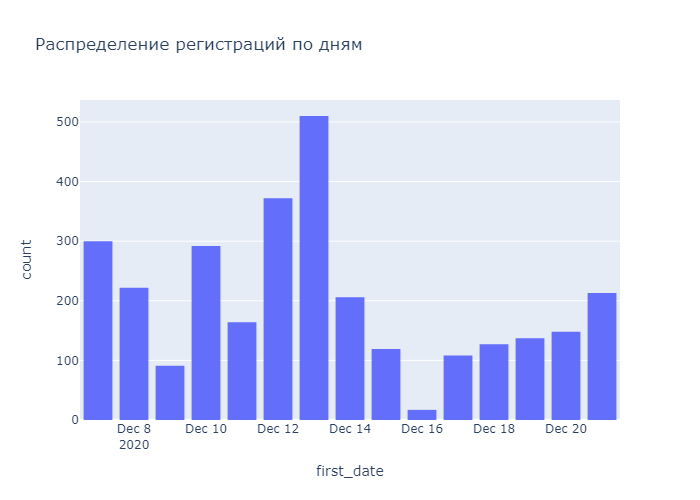

In [105]:
df = px.data.stocks()
fig = px.histogram(final_ab_new_users_no_events, x="first_date", title='Распределение регистраций по дням')
fig.update_layout(bargap=0.2)
fig.show()

На данном этапе были сделаны следующие выводы:  
* в данных имеются 2 теста, а именно: 'recommender_system_test' и 'interface_eu_test'  
*  имеются 2 тестируемые группы А и В  
* Дата запуска соответствует ТЗ - 2020-12-07  
* Дата остановки теста не соответствует ТЗ и равна 2020-12-30 23:36:33  
* Дата остановка работы набора новых пользователей соответствует ТЗ и равно 2020-12-21 00:00:00  
* процент пользователелей из региона EU отобранных для теста, равны 15% новых пользователей из региона EU за период отбора новых пользователей с 2020-12-07 по 2020-12-21  
* количество тестируемых пользователей не соответствует ТЗ и равно 2594  
* на преиод исследования проходили 2 акции, Christmas&New Year Promo и CIS New Year Gift Lottery, однако, так как только Christmas&New Year Promo проходил в EU, a у нас аудитория только из EU то влияние оказывало только данная акция
* Количество уникальных пользователей не совершивших ни одного действия 3026
* Как видим, пользователи, не совершавших действий в группе В - 1949, в группе А - 1077
* количество пользователей в тесте recommender_system_test не совершивших ни одного действия очень велико примерно 45% от общего количества участников теста recommender_system_test без учета пересечений между тестами и регионов пользователей. Большое количество пользователей теряется уже на этапе регистрации. Так же, можно сказать, что, потеряв такое количество тестируемых пользователей сразу на начальном этапе, может сильно сказаться на результатах теста, что в свою очередб является аргументом для его перезапуска
* подавляющее большинство клиентов, которые зарегестрировались и не совершали событий из региона EU

## Проведем исследователский анализ данных.

Узнаем как распределено количество событий на пользователя в выборках.

Сохраним в переменных group_a и group_b набор набор данных из обоих групп.

In [106]:
id_xz = final_ab_events_xz['user_id'].tolist()

In [107]:
final_ab_participants_xz = final_ab_events.query('user_id == @id_xz').reset_index(drop=True)

In [108]:
final_ab_participants_xz.head()

,user_id,event_dt,event_name,details
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
1,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99
2,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99
3,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99
4,A9908F62C41613A8,2020-12-07 11:26:47,purchase,9.99


In [109]:
final_ab_participants_xz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17526 entries, 0 to 17525
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     17526 non-null  object        
 1   event_dt    17526 non-null  datetime64[ns]
 2   event_name  17526 non-null  object        
 3   details     17526 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 547.8+ KB


In [110]:
final_ab_participants_xz_a_b = final_ab_participants_xz.merge(final_ab_participants, on='user_id')

In [111]:
final_ab_participants_xz_a_b.head()

,user_id,event_dt,event_name,details,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,A,recommender_system_test
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,A,recommender_system_test
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,A,recommender_system_test


In [112]:
group_a = final_ab_participants_xz_a_b.query('group == "A"').reset_index(drop=True)

In [113]:
group_b = final_ab_participants_xz_a_b.query('group == "B"').reset_index(drop=True)

Для точного расчета нам необходимо получить операции выполняемые каждым пользователем групп за 14 дней. Расчитаем сначала для группы А.

In [114]:
group_a

,user_id,event_dt,event_name,details,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,A,recommender_system_test
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,A,recommender_system_test
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,A,recommender_system_test
...,...,...,...,...,...,...
13737,64597B30278462F5,2020-12-23 14:14:46,login,0.00,A,recommender_system_test
13738,1484BBF124DB1B18,2020-12-21 17:51:44,login,0.00,A,recommender_system_test
13739,1484BBF124DB1B18,2020-12-22 16:02:18,login,0.00,A,recommender_system_test
13740,1484BBF124DB1B18,2020-12-27 10:53:34,login,0.00,A,recommender_system_test


In [115]:
events_a_count = group_a.groupby('user_id').agg({'event_name': 'count'}).reset_index()
              

In [116]:
events_a_count

,user_id,event_name
0,0010A1C096941592,12
1,003DF44D7589BBD4,15
2,00505E15A9D81546,5
3,006E3E4E232CE760,6
4,00A52DCF85F1BE03,2
...,...,...
1934,FF4456FBA59116E3,12
1935,FF5A1CD38F5DD996,10
1936,FF5B24BCE4387F86,9
1937,FF825C1D791989B5,8


Узнаем среднее количество действий на клиента для группы А.

In [117]:
round(events_a_count['event_name'].mean())

7

Среднее количество действий на пользователя в группу А примерно равно 7.

Узнаем медианное количество действий на клиента для группы А.

In [118]:
events_a_count['event_name'].median()

6.0

Медианное количество действий на пользователя в группу А равно 6.

Проделаем тоже самое для группы В.

In [119]:
events_b_count = (group_b.sort_values(by='user_id')
        .groupby('user_id')
        .agg({'event_name': 'count'})
        .reset_index()
              )

In [120]:
events_b_count

,user_id,event_name
0,005E096DBD379BCF,4
1,015D1E3BB893349D,6
2,015FF3EC72C1F4F6,2
3,01B0B891CA513468,12
4,020F8E77125B9F7A,8
...,...,...
650,FD43AFAEA83A6A3F,6
651,FDF5D9D1B047FA31,6
652,FE244437A4224900,2
653,FE76759FE6BF8C68,20


Узнаем среднее количество действий на клиента для группы В.

In [121]:
round(events_b_count['event_name'].mean())

6

Узнаем медианное количество действий на клиента для группы В.

In [122]:
events_b_count['event_name'].median()

5.0

Как видим, среднее значение событий на пользователя в группе А - 7, в группе В - 6. Медианное значение событий на пользователя в группе А - 6, в группе В - 5.

Узнаем, как распределились события в группах по дням.

In [123]:
group_a.head()

,user_id,event_dt,event_name,details,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,A,recommender_system_test
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,A,recommender_system_test
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,A,recommender_system_test


In [124]:
group_a['date'] = pd.to_datetime(group_a['event_dt']).dt.date

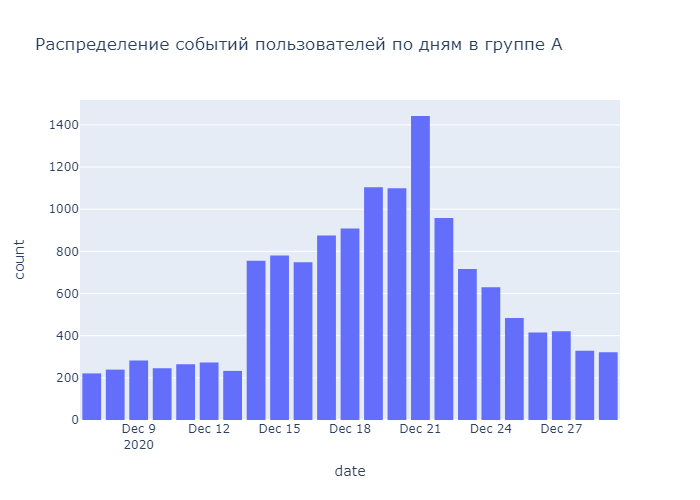

In [125]:
df = px.data.stocks()
fig = px.histogram(group_a, x="date", title='Распределение событий пользователей по дням в группе А')
fig.update_layout(bargap=0.2)
fig.show()

Как видим, основной всплеск событий приходится на период с 14 по 21 декабря включительно, после чего идет спад. 

Посмотрим, как распределились события в группе В.

In [126]:
group_b['date'] = pd.to_datetime(group_b['event_dt']).dt.date

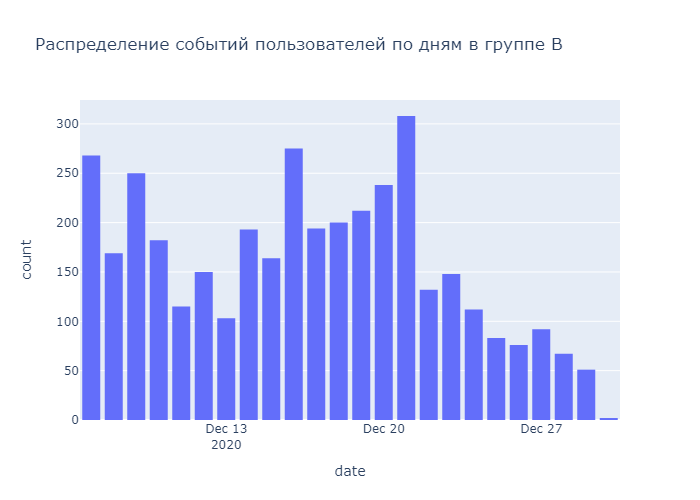

In [127]:
df = px.data.stocks()
fig = px.histogram(group_b, x="date", title='Распределение событий пользователей по дням в группе B', nbins=25)
fig.update_layout(bargap=0.2)
fig.show()


Как видим, основной всплеск событий приходится на период с 14 по 21 декабря включительно, после чего идет спад. 

Основной всплеск событий приходится на период с 14 по 21 декабря включительно в обеих группах, после чего идет спад.

Посмотрим, как менялась конверсия пользователей по событиям в воронке в выборках на разных этапах. Начнем с группы А.

In [128]:
group_a.head()

,user_id,event_dt,event_name,details,group,ab_test,date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,A,recommender_system_test,2020-12-09
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,0.00,A,recommender_system_test,2020-12-07
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,0.00,A,recommender_system_test,2020-12-08
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,0.00,A,recommender_system_test,2020-12-09


In [129]:
count_id = group_a.groupby('event_name').agg({'user_id': 'nunique'})

In [130]:
count_id = count_id.reset_index().sort_values(by='user_id', ascending=False).reset_index(drop=True)

In [131]:
count_id

,event_name,user_id
0,login,1939
1,product_page,1265
2,purchase,613
3,product_cart,589


Посчитаем, какая доля пользователей проходит на следующий шаг воронки.

In [132]:
count_id['last_percent'] = round(count_id['user_id']/
                           count_id['user_id'].shift(1) * 100, 2)

In [133]:
count_id

,event_name,user_id,last_percent
0,login,1939,NaN
1,product_page,1265,65.24
2,purchase,613,48.46
3,product_cart,589,96.08


Добавим конверсию относительно login

In [134]:
count_id['login_percent'] = round(count_id['user_id']/count_id.loc[0, 'user_id'], 2)*100

In [135]:
count_id = count_id.reindex([0, 1, 3, 2]).reset_index(drop=True)
count_id

,event_name,user_id,last_percent,login_percent
0,login,1939,NaN,100.0
1,product_page,1265,65.24,65.0
2,product_cart,589,96.08,30.0
3,purchase,613,48.46,32.0


Как видим, больше всего пользователей теряется при переходе с этапа product_page к product_cart	и в абсолютном и относительном значениях. Так же можно заметить, что пользователей с этапом purchase больше чем с product_cart. Значит возможна покупка не заходя в корзину. 

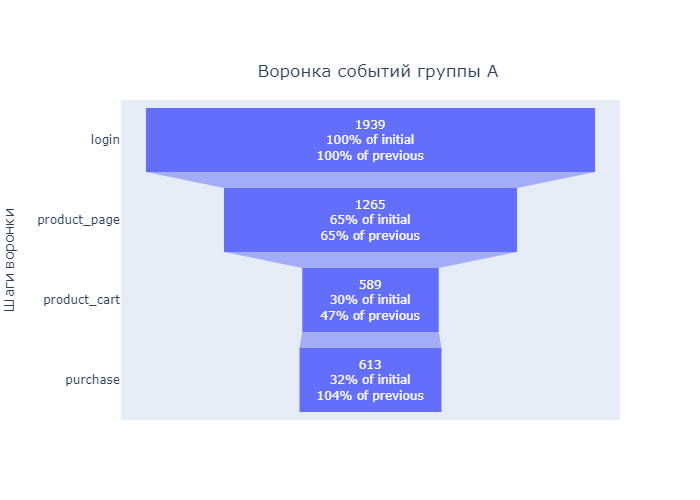

In [136]:
fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'last_percent',
    y = count_id['event_name'],
    x = count_id['user_id'],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous"))
fig.update_layout(yaxis_title='Шаги воронки', 
        title={
        'text': 'Воронка событий группы А',
        'y':0.87,
        'x':0.54,
        'xanchor': 'center',
        'yanchor': 'top'}, showlegend=False)

Посмотрим, как менялась конверсия пользователей по событиям в воронке в выборках на разных этапах в группе B.

In [137]:
count_id_b = group_b.groupby('event_name').agg({'user_id': 'nunique'})

In [138]:
count_id_b = count_id_b.reset_index().sort_values(by='user_id', ascending=False).reset_index(drop=True)

In [139]:
count_id_b = count_id_b.reindex([0, 1, 3, 2]).reset_index(drop=True)

In [140]:
count_id_b

,event_name,user_id
0,login,655
1,product_page,367
2,product_cart,184
3,purchase,191


In [141]:
count_id_b['last_percent'] = round(count_id_b['user_id']/
                           count_id_b['user_id'].shift(1) * 100, 2)

In [142]:
count_id_b

,event_name,user_id,last_percent
0,login,655,NaN
1,product_page,367,56.03
2,product_cart,184,50.14
3,purchase,191,103.80


In [143]:
count_id_b['login_percent'] = round(count_id_b['user_id']/count_id_b.loc[0, 'user_id'], 2)*100

In [144]:
count_id_b

,event_name,user_id,last_percent,login_percent
0,login,655,NaN,100.0
1,product_page,367,56.03,56.0
2,product_cart,184,50.14,28.0
3,purchase,191,103.80,29.0


Как видим, наибольшее количесво потерь, в относительных значениях, пользователей у нас при переходе от product_page	к product_cart. Так же можно заметить, что пользователей с этапом purchase больше чем с product_cart. Значит возможна покупка не заходя в корзину. Это имеет место и с группой А. Отобразим графически распределение пользователей.

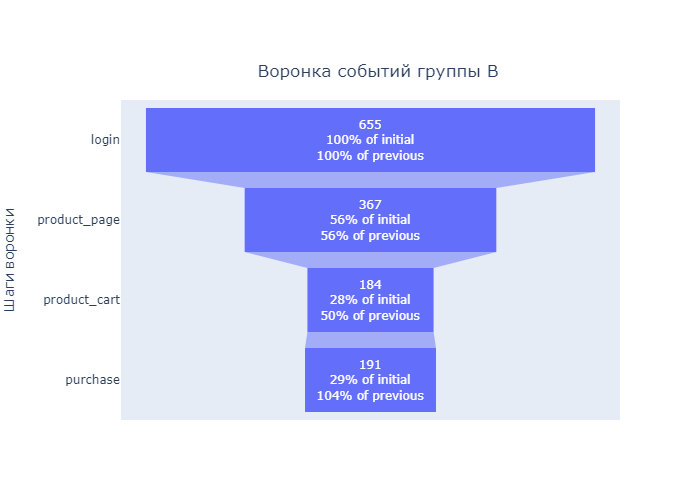

In [145]:
fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'last_percent',
    y = count_id_b['event_name'],
    x = count_id_b['user_id'],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous"))
fig.update_layout(yaxis_title='Шаги воронки', 
        title={
        'text': 'Воронка событий группы B',
        'y':0.87,
        'x':0.54,
        'xanchor': 'center',
        'yanchor': 'top'}, showlegend=False)

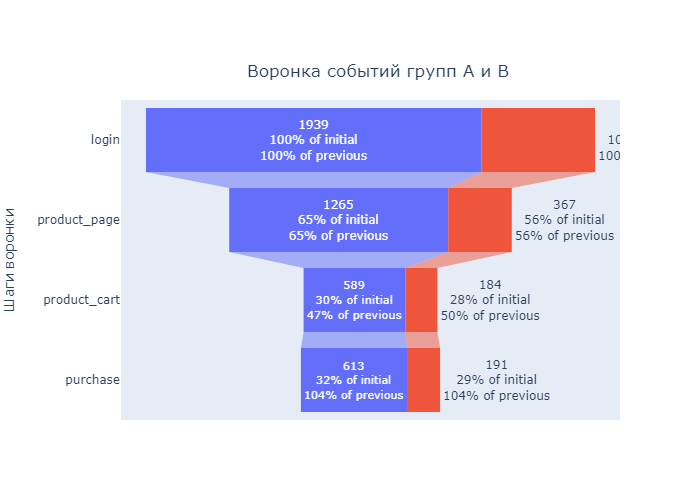

In [149]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    y = count_id['event_name'],
    x = count_id['user_id'],
    textinfo = "value+percent initial+percent previous"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = count_id_b['event_name'],
    x = count_id_b['user_id'],
    textinfo = "value+percent initial+percent previous"))
fig.update_layout(yaxis_title='Шаги воронки', 
        title={
        'text': 'Воронка событий групп A и B',
        'y':0.87,
        'x':0.54,
        'xanchor': 'center',
        'yanchor': 'top'}, showlegend=False)
fig.show()

Как видим, группа В не показала улучшение конверсии на 10% за 14 дней. На этапе product_cart наблюдается увеличение конверсии, но так как есть возможность перехода с product_page сразу в purchase, нельзя объективно оценить данное улучшение.

Как видим воронка имеет 4 этапа в порядке последовательности:

* login - пользователь зашел на сайт  
* product_page - просмотрел товар  
* product_cart - попал в корзину  
* purchase - совершил покупку.

Показатели конверсии относительного предыдущего значения в группе А распределились в процентной соотношении так: product_page - 65%, product_cart - 47%, purchase - 104%. Показатели конверсии относительного предыдущего значения в группе В распределились в процентной соотношении так: product_page - 56%, product_cart - 50%, purchase - 104%. Показатели конверсии относительного первого значения значения в группе А распределились в процентной соотношении так: product_page - 65%, product_cart - 30%, purchase - 32%. Показатели конверсии относительного первого значения в группе В распределились в процентной соотношении так: product_page - 56%, product_cart - 28%, purchase - 29%.

Наибольшее количество пользователей отсеивается при переходе с этапа product_page к product_cart в обеих группах. 

В ТЗ ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%. Исходя из полученных данных, улучшений не произошло, а наоброт, показатели конверсии на некоторых этапах сократилась.

Перед проведение АB теста стоит учесть, что размеры групп изначально различны. В данных имеются пользователи, которые попали в 2 теста сразу. Так же нужно учесть, что во время проведения теста проходили маркетинговые события, что могло в последствии сильно сказаться на результатах теста. Дата завершения теста не соответствует ТЗ. О ключевых метриках по группам ничего не известно. Исходя из этого, при проведении АВ теста невозможно гарантировать его практическую значимость. Так же стоит отметит, что по ТЗ должны быть увеличена конвесия в течении 14 дней, чего так же не случилось, показатели стали даже ниже.

На данном этапе сделаны следующие выводы:  
* Среднее количество действий на пользователя в группе А примерно равно 7  
* Медианное количество действий на пользователя в группе А равно 6  
* Среднее количество действий на пользователя в группе В примерно равно 6  
* Медианное количество действий на пользователя в группе B равно 5   
* основной всплеск событий в группе А приходится на период с 14 по 15 декабря включительно. Также заметен рост количества событий 28 и 29 декабря.
* Основной всплеск событий приходится на период с 14 по 21 декабря включительно в обеих группах, после чего идет спад. 
* больше всего пользователей в группе А теряется при переходе с этапа product_page к product_cart.  
* наибольшее количесво потерь, в относительных значениях, пользователей у нас при переходе от product_page	к product_cart. Так же можно заметить, что пользователей с этапом purchase больше чем с product_cart. Значит возможна покупка не заходя в корзину. Это возможно имеет место и с группой А. Отобразим графически распределение пользователей.
* за 14 дней с момента регистрации пользователи не покажзали улучшение каждой метрики не менее, чем на 10%, при этом некоторые метрики только ухудшились.
* Показатели конверсии относительного предыдущего значения в группе А распределились в процентной соотношении так: product_page - 65%, product_cart - 47%, purchase - 104%. Показатели конверсии относительного предыдущего значения в группе В распределились в процентной соотношении так: product_page - 56%, product_cart - 50%, purchase - 104%. Показатели конверсии относительного первого значения значения в группе А распределились в процентной соотношении так: product_page - 65%, product_cart - 30%, purchase - 32%. Показатели конверсии относительного первого значения в группе В распределились в процентной соотношении так: product_page - 56%, product_cart - 28%, purchase - 29%.

## А/В-тестирование.

У нас в распоряжении имеются 2 группы пользователей. Внутри каждой группы имеется деление пользователей по совершенным ими действиям в определенной последвательности. Исходя из данной последовательности, мы имеем долю каждого совершенного действия пользователями каждой из групп. Соостветственно мы можем проверить гипотезу о равенстве долей в данной последовательности в каждой из групп. Для проверки данной гипотезы воспользуемся z-тестом. При проверке выберем статистическую значимость равную 0.05. Сформулируем нулевую и альтернативную гипотезу для проверки равенства долей в событиях в группах. Нулевая гипотеза - между долями нет статистически значимой разницы. Альтернативная - между долями есть статистическая разница. Проверим данные гипотезы для групп А и В в разрезе каждого из событий.

In [150]:
def z_value_diff(first_group, second_group, alpha,  third_group, fourth_group):
   
    successes = [first_group, second_group]
    trials = [third_group, fourth_group]
    
    print(successes, trials)

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
 
    # разница пропорций в датасетах
    difference = p1 - p2 

    z_value = difference/mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1])) # ваш код

    distr = st.norm(0, 1) # ваш код

    p_value = (1 - distr.cdf(abs(z_value))) * 2 # ваш код

    print('p-значение: ', p_value)

    if p_value < alpha: # ваш код
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

In [151]:
count_id

,event_name,user_id,last_percent,login_percent
0,login,1939,NaN,100.0
1,product_page,1265,65.24,65.0
2,product_cart,589,96.08,30.0
3,purchase,613,48.46,32.0


In [152]:
count_id_b

,event_name,user_id,last_percent,login_percent
0,login,655,NaN,100.0
1,product_page,367,56.03,56.0
2,product_cart,184,50.14,28.0
3,purchase,191,103.80,29.0


In [153]:
z_value_diff(count_id.loc[1,'user_id'], count_id_b.loc[1,'user_id'], 0.05, count_id.loc[0,'user_id'], 
             count_id_b.loc[0,'user_id'])

[1265, 367] [1939, 655]
p-значение:  2.457788807452843e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница


По событию product_page отвергаем нулевую гипотезу.

In [154]:
z_value_diff(count_id.loc[2,'user_id'], count_id_b.loc[2,'user_id'], 0.05, count_id.loc[0,'user_id'], 
             count_id_b.loc[0,'user_id'])

[589, 184] [1939, 655]
p-значение:  0.26899325584838074
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию product_cart отвергнуть не плучилось

In [155]:
z_value_diff(count_id.loc[3,'user_id'], count_id_b.loc[3,'user_id'], 0.05, count_id.loc[0,'user_id'], 
             count_id_b.loc[0,'user_id'])

[613, 191] [1939, 655]
p-значение:  0.24035836270660704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


По событию purchase отвергнуть нулевую гипотезу не получилось

Так как у нас множественный тест с одними и теми же данными можно было бы применить методы корректировки значения требуемого уровня значимости, но так как в полученных значениях уровень p_value гораздо больше значения alpha, а методы корректировки значения только уменьшают значение alpha, поэтому расчет с учетом метода корректировки значения требуемого уровня значимости не повлияет на результат.

На данном этапе была отвергнута нулевая гипотеза о том, что между долями событий product_page пользоватей групп А и В есть статистическая значимость. Между долями событий product_cart	и purchase пользоватей групп А и В нет статистической значимости.

## Общий вывод

__Выполняя проект, были проделаны следующие работы:__  
1. Загрузка и ознакомление с предоставленными данными  
2. Подготовка данных  
3. Анализ данных, а именно:  
  * проверка проводимых тестов в данных  
  * проверка групп в тесте  
  * проверка даты запуска теста  
  * проверка даты остановки теста  
  * проверка остановки набора теста  
  * проверк ааудитории теста  
  * проверка ожидаемого количества тестируемых  
  * проверка на влияние на исследование маркетинговых событий 
4. Проведен исследовательский анализ теста  
5. Проведено А/В - тестирование.

__Выполняя проект, были сделаны следующие выводы:__ 
* в данных имеются 2 теста, а именно: 'recommender_system_test' и 'interface_eu_test'  
*  имеются 2 тестируемые группы А и В  
* Дата запуска соответствует ТЗ - 2020-12-07  
* Дата остановки теста не соответствует ТЗ и равна 2020-12-30 23:36:33  
* Дата остановка работы набора новых пользователей соответствует ТЗ и равно 2020-12-21 00:00:00  
* процент пользователелей из региона EU отобранных для теста, равны 15% новых пользователей из региона EU за период отбора новых пользователей с 2020-12-07 по 2020-12-21  
* количество тестируемых пользователей не соответствует ТЗ и равно 256  
* на преиод исследования проходили 2 акции, Christmas&New Year Promo и CIS New Year Gift Lottery, однако, так как только Christmas&New Year Promo проходил в EU, a у нас аудитория только из EU то влияние оказывало только данная акция
* Количество уникальных пользователей не совершивших ни одного действия 3026
* Как видим, пользователи, не совершавших действий в группе В - 1949, в группе А - 1077
* количество пользователей в тесте recommender_system_test не совершивших ни одного действия очень велико примерно 45% от общего количества участников теста recommender_system_test без учета пересечений между тестами и регионов пользователей. Большое количество пользователей теряется уже на этапе регистрации. Так же, можно сказать, что, потеряв такое количество тестируемых пользователей сразу на начальном этапе, может сильно сказаться на результатах теста, что в свою очередб является аргументом для его перезапуска
* Среднее количество действий на пользователя в группе А примерно равно 7  
* Медианное количество действий на пользователя в группе А равно 6  
* Среднее количество действий на пользователя в группе В примерно равно 6  
* Медианное количество действий на пользователя в группе B равно 5   
* основной всплеск событий в группе А приходится на период с 14 по 15 декабря включительно. Также заметен рост количества событий 28 и 29 декабря.
* Основной всплеск событий приходится на период с 14 по 21 декабря включительно в обеих группах, после чего идет спад. 
* больше всего пользователей в группе А теряется при переходе с этапа product_page к product_cart.  
* наибольшее количесво потерь, в относительных значениях, пользователей у нас при переходе от product_page	к product_cart. Так же можно заметить, что пользователей с этапом purchase больше чем с product_cart. Значит возможна покупка не заходя в корзину. Это возможно имеет место и с группой А. Отобразим графически распределение пользователей.
* за 14 дней с момента регистрации пользователи не покажзали улучшение каждой метрики не менее, чем на 10%, при этом некоторые метрики только ухудшились.
* Показатели конверсии относительного предыдущего значения в группе А распределились в процентной соотношении так: product_page - 65%, product_cart - 47%, purchase - 104%. Показатели конверсии относительного предыдущего значения в группе В распределились в процентной соотношении так: product_page - 56%, product_cart - 50%, purchase - 104%. Показатели конверсии относительного первого значения значения в группе А распределились в процентной соотношении так: product_page - 65%, product_cart - 30%, purchase - 32%. Показатели конверсии относительного первого значения в группе В распределились в процентной соотношении так: product_page - 56%, product_cart - 28%, purchase - 29%.
* отвергнута нулевая гипотеза о том, что между долями событий product_page пользоватей групп А и В нет статистически значимой разницы. Между долями событий product_cart	и purchase пользоватей групп А и В есть статистическая значимость. 
* Делая выводы о проведенном тесте следует учесть следующие моменты. Размеры групп изначально различны. В данных имеются пользователи, которые попали в 2 теста сразу. Так же нужно учесть, что во время проведения теста проходили маркетинговые события, что могло в последствии сильно сказаться на результатах теста. Дата завершения теста не соответствует ТЗ. О ключевых метриках по группам ничего не известно. Так же почти половина пользователей зарегестрированных в качестве участников теста не совершали никаких действий. В группах имеются пользователи не из регионов EU. Так же стоит отметит, что по ТЗ должны быть увеличена конвесия в течении 14 дней, на 10 % на всех этапах чего так же не случилось, показатели стали даже ниже. Исходя из этого, можно сделать вывод о том, что А/В тест проведен не корректно и не имеет практической значимости.